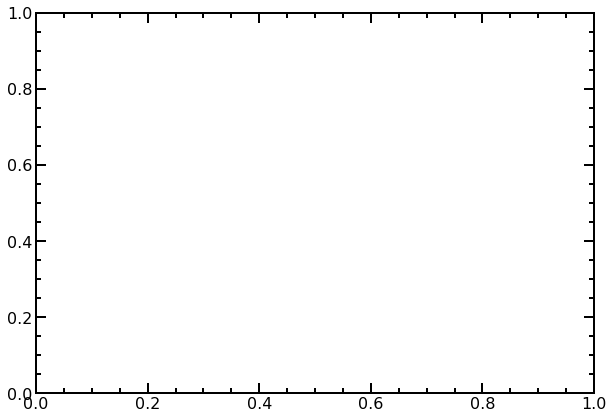

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import qchard_fluxonium as fluxonium
from Fluxonium_hamiltonians import qchard_pshapes as pshapes
from Fluxonium_hamiltonians import qchard_evolgates as gates
from Fluxonium_hamiltonians import qchard_evolgates_double as gates_double
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
#Device parameters
nlev_lc = 20
nlev_single = 5  # The number of single-qubit levels to show.
take_data_from_input_file = False

if not take_data_from_input_file:
    # Parameters of the first fluxonium.
    E_L = 1  # inductive energy
    E_C = 1.0  # charging energy
    E_J = 7  # Josephson energy
    phi_ext = 0.96*np.pi  # external phase shift

qubit = fluxonium.Fluxonium(E_J = E_J, E_C=E_C, E_L=E_L, phi_ext=phi_ext, nlev = nlev_single, nlev_lc = nlev_lc)
H_nodrive = qubit.H()

psi0 = basis(nlev_single, 0)
psi1 = basis(nlev_single, 1)
psi2 = basis(nlev_single, 2)
psi3 = basis(nlev_single, 3)
psi4 = basis(nlev_single, 4)

P0 = psi0 * psi0.dag()
P1 = psi1 * psi1.dag()
P2 = psi2 * psi2.dag()
P3 = psi3 * psi3.dag()
P4 = psi4 * psi4.dag()

In [8]:
#Gate parameter
T_gate = 10 #ns
t_points = np.linspace(0, T_gate, 10 * int(T_gate) + 1)
drive_amplitude_factor = 1
delta_omega_d1 = 0
delta_omega_d2 = 0
shape = 'gauss'
sigma = 0.25
drag = True
drag_coeff = 0.0

ini_state1 = 0
fin_state1 = 2
omega_d_1 = qubit.freq(ini_state1,fin_state1) + delta_omega_d1
matr_el_1 = np.abs(qubit.n_ij(ini_state1,fin_state1))

ini_state2 = 1
fin_state2 = 3
omega_d_2 = qubit.freq(ini_state2,fin_state2) + delta_omega_d2
matr_el_2 = np.abs(qubit.n_ij(ini_state2,fin_state2))

epsilon = drive_amplitude_factor/(matr_el_1+matr_el_2)

H_drive = epsilon*(qubit.n())
H_dummy = 0*(qubit.n())
U_t = gates_double.evolution_operator_microwave(
                qubit.H(), H_drive, t_points=t_points, DRAG = drag, DRAG_coefficient_1 = drag_coeff, DRAG_coefficient_2 = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, omega_d_1=omega_d_1,omega_d_2=omega_d_2)

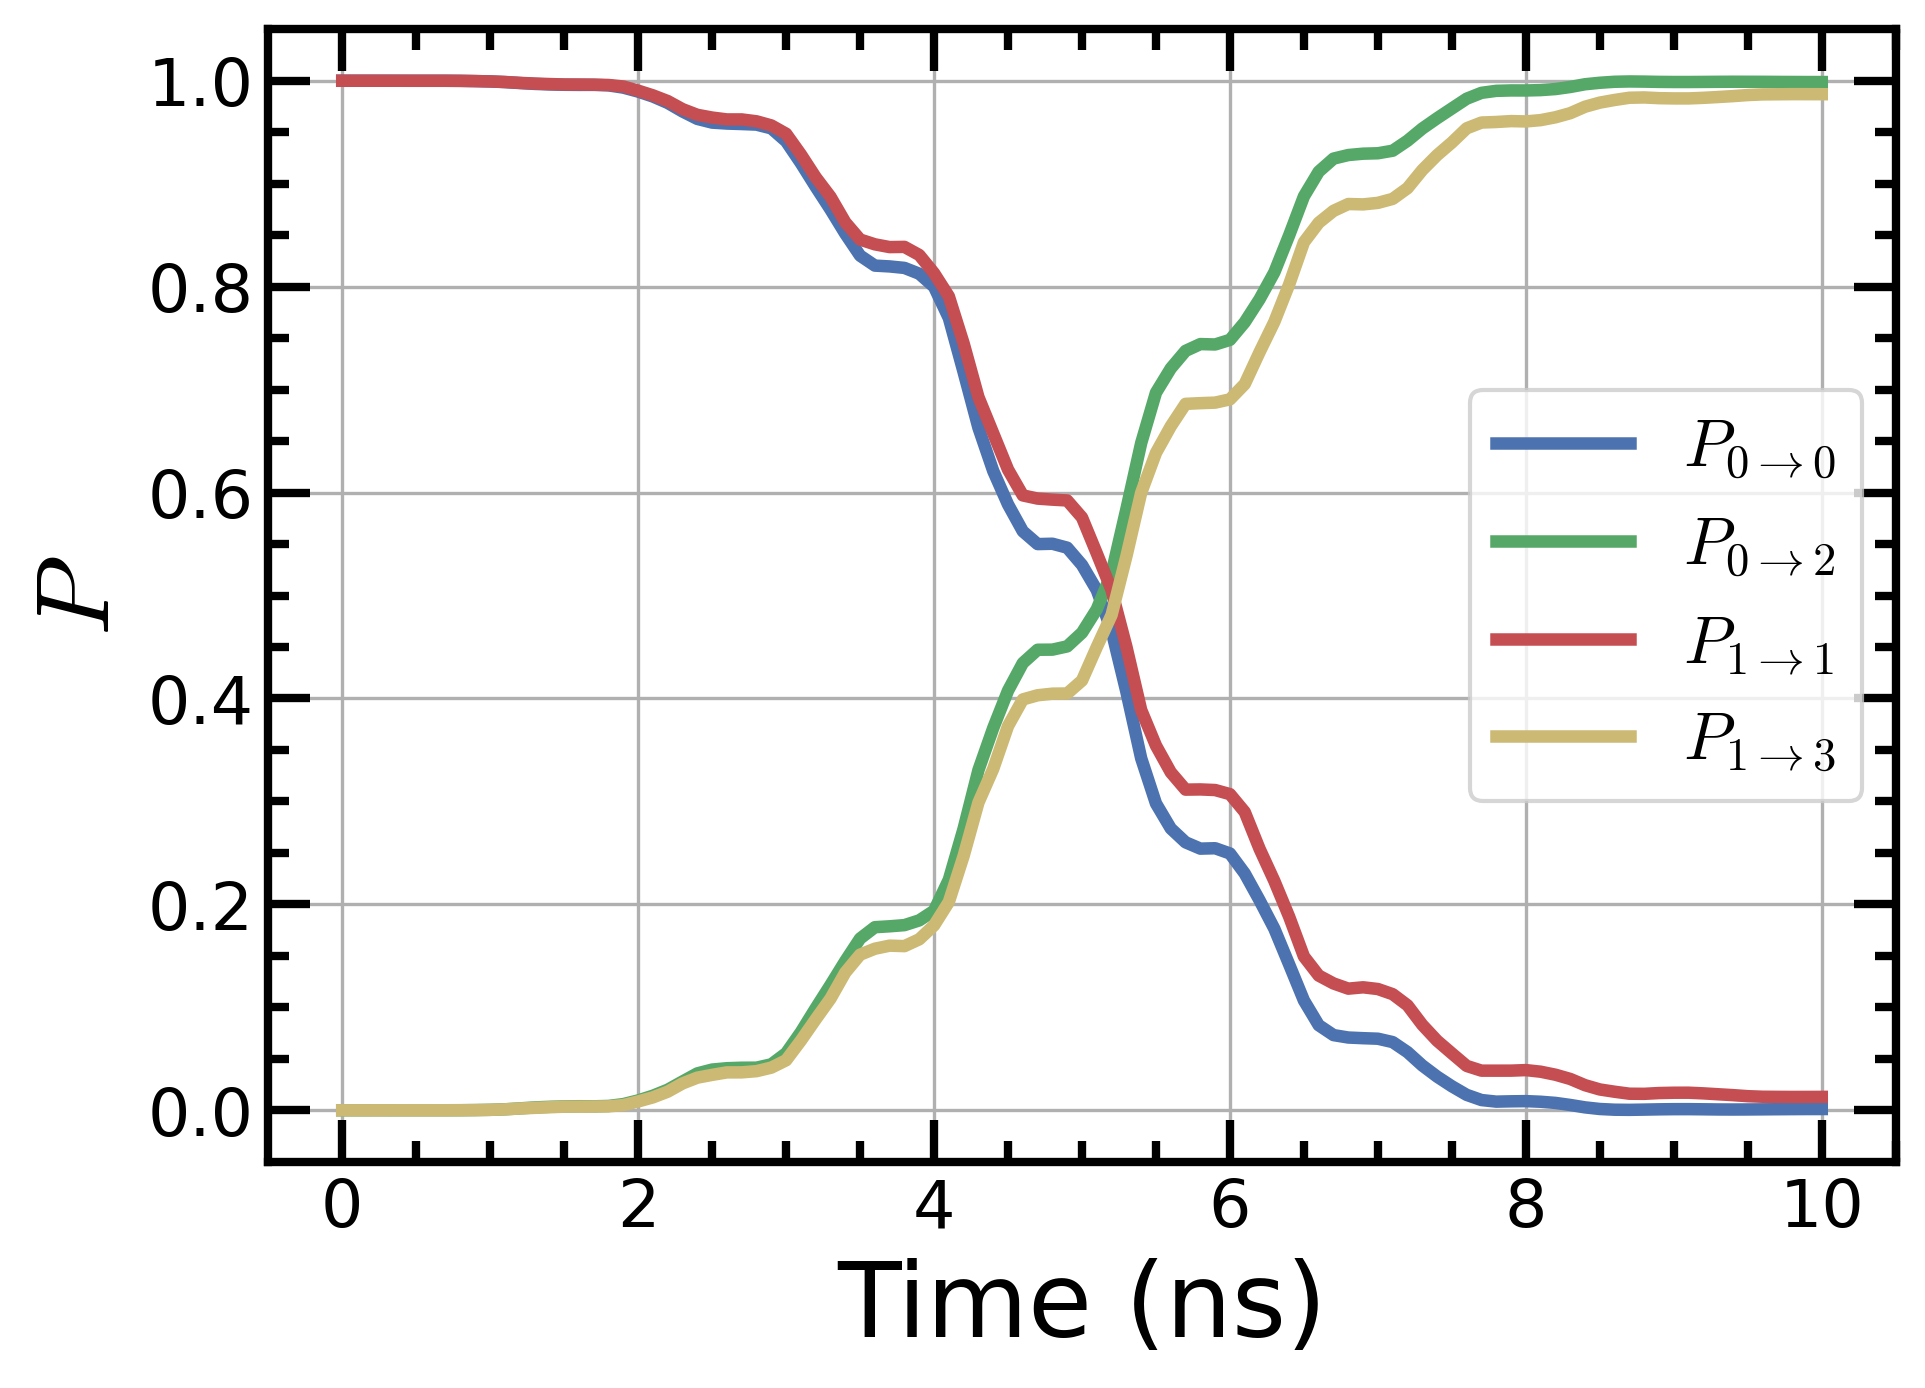

In [9]:
trans_prob_00 = gates.prob_transition(U_t, psi0, psi0)
trans_prob_02 = gates.prob_transition(U_t, psi0, psi2)
trans_prob_11 = gates.prob_transition(U_t, psi1, psi1)
trans_prob_13 = gates.prob_transition(U_t, psi1, psi3)
trans_prob_23 = gates.prob_transition(U_t, psi2, psi3)
trans_prob_22 = gates.prob_transition(U_t, psi2, psi2)

plt.figure(figsize = [7,5])
plt.plot(t_points, trans_prob_00, label=r'$P_{0\rightarrow 0}$')
plt.plot(t_points, trans_prob_02, label=r'$P_{0\rightarrow 2}$')
plt.plot(t_points, trans_prob_11, label=r'$P_{1\rightarrow 1}$')
plt.plot(t_points, trans_prob_13, color = 'C4', label=r'$P_{1\rightarrow 3}$')
# plt.plot(t_points, trans_prob_23, label=r'$P_{2\rightarrow 3}$')
# plt.plot(t_points, trans_prob_22, label=r'$P_{2\rightarrow 2}$')
plt.xlabel('Time (ns)')
plt.ylabel(r'$P$')
plt.legend()
plt.grid()